## imports 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.metrics import classification_report  ,  confusion_matrix , ConfusionMatrixDisplay 
import pickle
from xgboost import XGBClassifier
from sklearn.svm import SVC


## Fun 

In [10]:
def check_shape(x_train,x_test,y_train,y_test):
    print('x_train shape: ',x_train.shape)
    print('y_train shape: ',y_train.shape)
    print('--'*20)
    print('x_test shape: ',x_test.shape)
    print('y_test shape: ',y_test.shape)

In [11]:
def train_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    print('Classification Report for Test Data')
    print('--'*20)
    print(classification_report(y_test,test_pred))
    print('=='*25)
    print('Classification Report for Train Data')
    print('--'*20)
    print(classification_report(y_train,train_pred))
    
    cm_train  = confusion_matrix(y_train,train_pred)
    cm_test  = confusion_matrix(y_test,test_pred)

    return cm_train,cm_test

## reaa data 

In [13]:
df = df = pd.read_csv (r"C:\Users\ziadh\Desktop\hand_landmarks_template.csv")

In [14]:
df.head ()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [16]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [17]:
duplicates = df.duplicated().sum()
duplicates

0

In [18]:
print (" the shape of the data:")
df.shape

 the shape of the data:


(25675, 64)

## Data Visualization


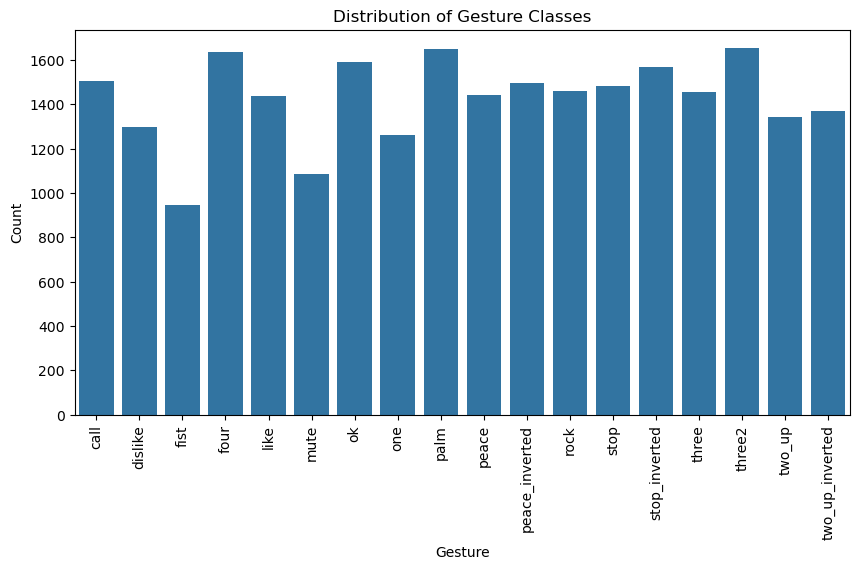

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['label'])
plt.title('Distribution of Gesture Classes')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## preproccising

In [22]:
## #Data Splitting
X = df.drop(['label'] , axis= 1)
Y = df['label']  
#split the data into train and test 80% and 20%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [27]:
# Label Encoding
encoder = LabelEncoder()

# Fit only on the train set to avoid data leakage and apply transform on the test set
Encoded_Y_train = encoder.fit_transform(Y_train)
Encoded_Y_test = encoder.transform(Y_test)

# Save the fitted encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Print to check classes
print("Classes:", encoder.classes_)


Classes: ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


In [24]:
def normalize_data(df):
    # Extract hand base position (x1, y1)
    hand_base_x = df['x1']
    hand_base_y = df['y1']

    # Extract fingertip position (x13, y13)
    fingertip_x = df['x13']
    fingertip_y = df['y13']

    # Compute Euclidean distance for scale normalization
    scale = np.sqrt((fingertip_x - hand_base_x) ** 2 + (fingertip_y - hand_base_y) ** 2)

    # Prevent division by zero
    scale[scale == 0] = 1

    # Normalize all landmark positions
    for i in range(1, 22):
        df[f'x{i}'] = (df[f'x{i}'] - hand_base_x) / scale
        df[f'y{i}'] = (df[f'y{i}'] - hand_base_y) / scale

    return df

# Apply the normalization to training and test datasets
X_train_normalized = normalize_data(X_train.copy())
X_test_normalized = normalize_data(X_test.copy())


### XGBoost Model

In [29]:
## Initialize the XGBoost model
model = XGBClassifier()

# Train the model on the normalized training data and encoded labels
model.fit(X_train_normalized, Encoded_Y_train)

# Predict the labels for the test data
preds = model.predict(X_test_normalized)

# Evaluate the model's performance
accuracy = accuracy_score(Encoded_Y_test, preds)
precision = precision_score(Encoded_Y_test, preds, average='macro', zero_division=0)
recall = recall_score(Encoded_Y_test, preds, average='macro', zero_division=0)
f1 = f1_score(Encoded_Y_test, preds, average='macro', zero_division=0)

# Print the performance metrics
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")


XGBoost Model Performance:
Accuracy: 0.9799 | Precision: 0.9796 | Recall: 0.9797 | F1 Score: 0.9796


## SVM model

In [45]:
svm_model = SVC()

# Train the model
svm_model.fit(X_train_normalized, Encoded_Y_train)

# Predict on test set
svm_preds = svm_model.predict(X_test_normalized)

# Evaluate the SVM model
svm_accuracy = accuracy_score(Encoded_Y_test, svm_preds)
svm_precision = precision_score(Encoded_Y_test, svm_preds, average='macro', zero_division=0)
svm_recall = recall_score(Encoded_Y_test, svm_preds, average='macro', zero_division=0)
svm_f1 = f1_score(Encoded_Y_test, svm_preds, average='macro', zero_division=0)

print("SVM Model Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")


SVM Model Performance:
Accuracy: 0.9278
Precision: 0.9282
Recall: 0.9275
F1 Score: 0.9273


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter options for tuning
params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 0.8]
}

# Initialize base XGBoost model
xgb = XGBClassifier(objective='multi:softmax',
                    num_class=len(encoder.classes_),
                    use_label_encoder=False,
                    eval_metric='mlogloss')

# Setup GridSearchCV with 3 folds and macro F1 scoring
grid_search = GridSearchCV(xgb, param_grid=params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit GridSearch to training data
grid_search.fit(X_train_normalized, Encoded_Y_train)

# Best params found
best_params = grid_search.best_params_

# Train model with best params
best_model = XGBClassifier(**best_params,
                           objective='multi:softmax',
                           num_class=len(encoder.classes_),
                           use_label_encoder=False,
                           eval_metric='mlogloss')

best_model.fit(X_train_normalized, Encoded_Y_train)

# Predict on test set
y_pred = best_model.predict(X_test_normalized)

# Calculate metrics
acc = accuracy_score(Encoded_Y_test, y_pred)
prec = precision_score(Encoded_Y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(Encoded_Y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(Encoded_Y_test, y_pred, average='macro', zero_division=0)

# Print report
print("\n=== XGBoost Final Evaluation ===")
print(f"Params Selected: {best_params}")
print(f"Accuracy : {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Recall   : {rec*100:.2f}%")
print(f"F1 Score : {f1*100:.2f}%")
print("===============================\n")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


E:\ana\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
E:\ana\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Final Evaluation ===
Params Selected: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy : 98.19%
Precision: 98.17%
Recall   : 98.17%
F1 Score : 98.16%



In [69]:
import joblib
# Convert pandas DataFrame to numpy arrays if needed
X_train = X_train_normalized.values
y_train = Encoded_Y_train

X_test = X_test_normalized.values
y_test = Encoded_Y_test

# Define XGBoost model with the best hyperparameters you have
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("=== XGBoost Final Evaluation ===")
print("Params Selected: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("===============================")

# Save the trained model
joblib.dump(xgb_model, "xgboost_modelVS.pkl")
print("Model saved as 'xgboost_modelVS.pkl'")


E:\ana\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost Final Evaluation ===
Params Selected: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy : 98.19%
Precision: 98.20%
Recall   : 98.19%
F1 Score : 98.19%
Model saved as 'xgboost_modelVS.pkl'


In [20]:
import cv2
import numpy as np
import joblib
from cvzone.HandTrackingModule import HandDetector

# Load model and encoder
xgb_model = joblib.load("xgboost_modelVS.pkl")
encoder = joblib.load("label_encoder.pkl")

# Initialize hand detector
detector = HandDetector(maxHands=1, detectionCon=0.5)

# Normalize landmarks
def normalize_landmarks(data):
    wrist_x, wrist_y = data[0], data[1]
    mid_x, mid_y = data[36], data[37]
    scale = np.sqrt((mid_x - wrist_x)**2 + (mid_y - wrist_y)**2)
    if scale == 0:
        scale = 1
    normalized = np.zeros_like(data)
    for i in range(21):
        x = data[i*3]
        y = data[i*3+1]
        z = data[i*3+2]
        normalized[i*3] = (x - wrist_x) / scale
        normalized[i*3+1] = (y - wrist_y) / scale
        normalized[i*3+2] = z
    return normalized

# Preprocess landmarks
def preprocess_landmarks(landmarks):
    data = []
    for lm in landmarks:
        data.extend([lm[0], lm[1], lm[2]])
    data = np.array(data)
    data_norm = normalize_landmarks(data)
    return data_norm.reshape(1, -1)

# Video path (empty for webcam)
video_path = ""  # اكتب هنا مسار الفيديو لو موجود

# Open camera or video
cap = cv2.VideoCapture(0 if video_path == "" else video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect hands
    hands, img = detector.findHands(frame)
    if hands:
        hand = hands[0]
        landmarks = hand['lmList']
        features = preprocess_landmarks(landmarks)
        pred = xgb_model.predict(features)
        gesture = encoder.inverse_transform(pred)[0]
        cv2.putText(img, f"Gesture: {gesture}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Hand Gesture Recognition", img)

    # Close window when 'q' is pressed or 'X' button is clicked
    if cv2.waitKey(5) & 0xFF == ord('q') or cv2.getWindowProperty("Hand Gesture Recognition", cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()

E:\ana\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
